# Wholesale customers data

# Load and explore the dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


In [11]:
df=pd.read_csv('/Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [12]:
df.shape

(440, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [14]:
#description of the dataset
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [15]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [16]:
df.duplicated().sum()

np.int64(0)

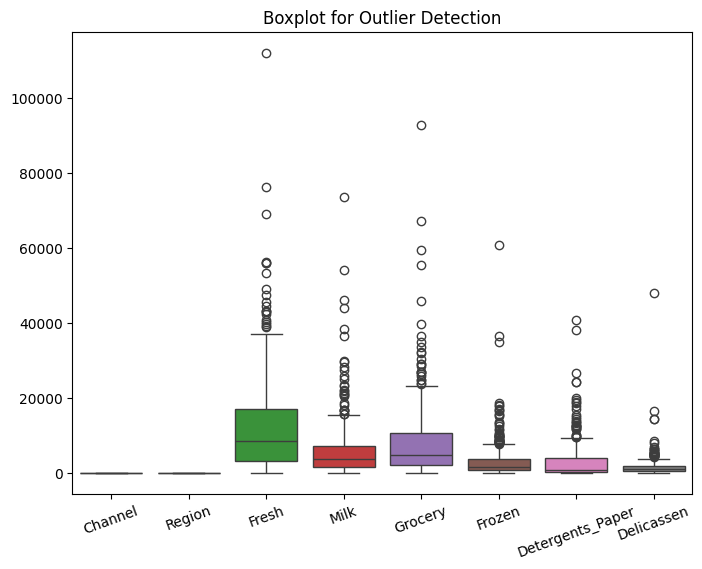

In [17]:
#outliers
#detect and handle outliers using boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.xticks(rotation=20)
plt.title("Boxplot for Outlier Detection")
plt.savefig('Boxplot for Outlier Detection.png')
plt.show()

# *Exploratory Data Analysis (EDA)*

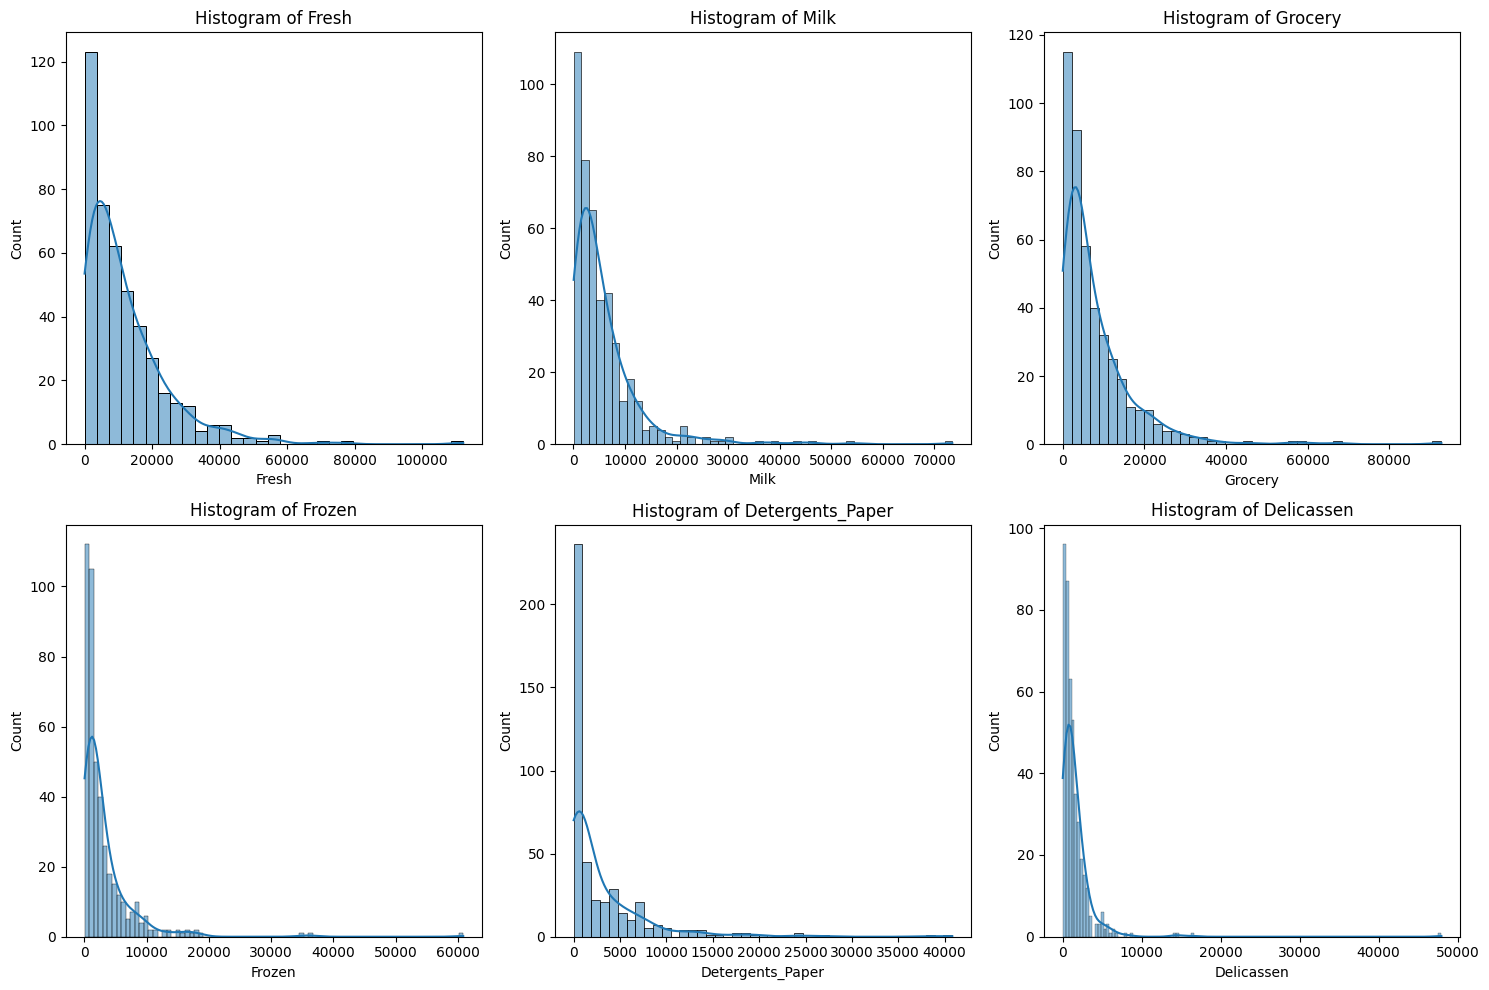

In [18]:
#Histograms for each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

columns_to_plot = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

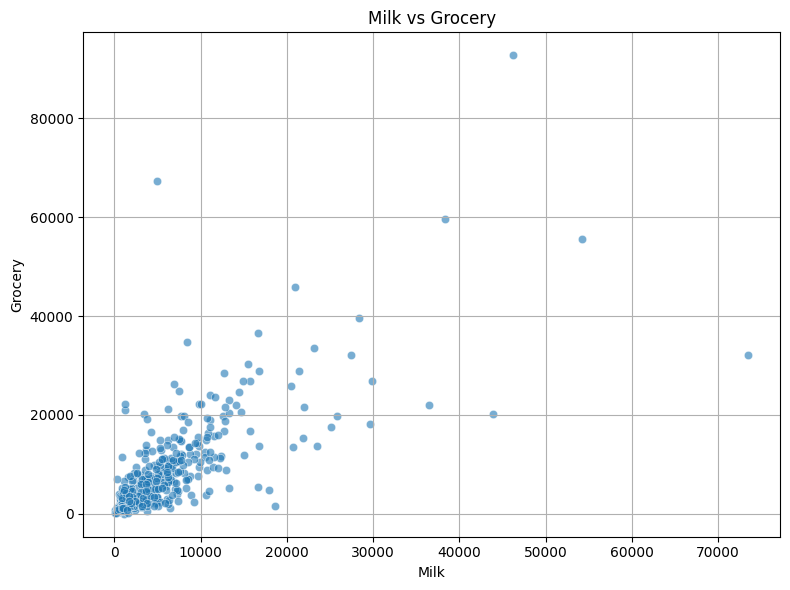

In [19]:
# Scatter plot ro view the relationship betwee milk & Grocery
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Milk', y='Grocery', alpha=0.6)
plt.title('Milk vs Grocery')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.grid(True)
plt.tight_layout()
plt.show()

.
The scatter plot shows a positive relationship between Milk and Grocery spending.

.As Milk expenditure increases, Grocery expenditure tends to increase as well.

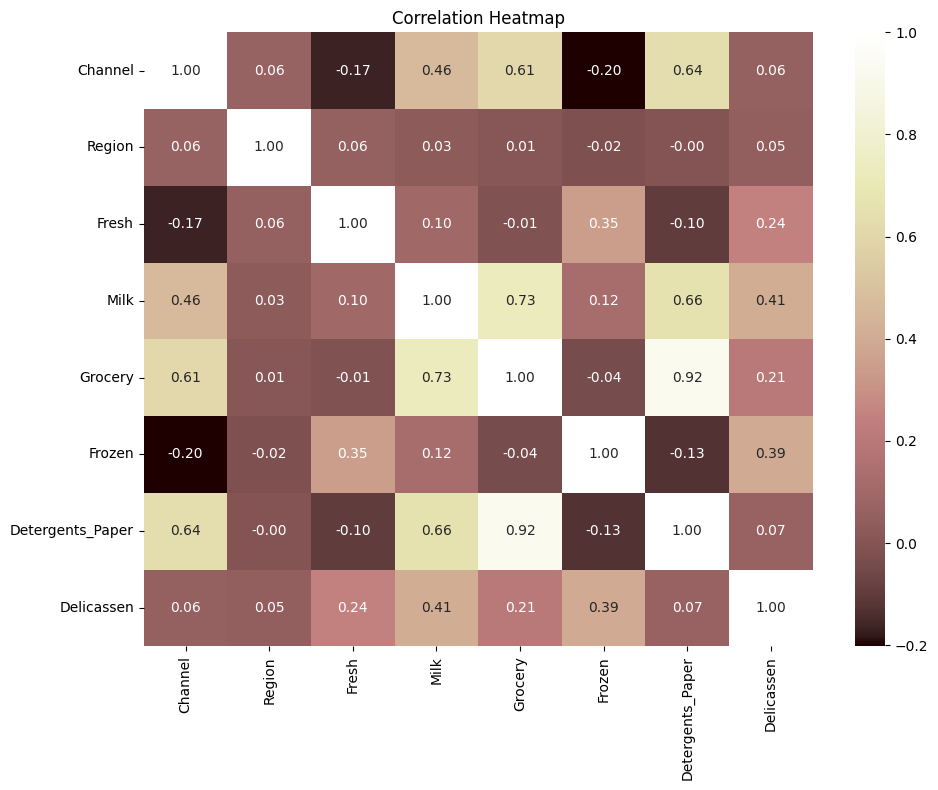

In [20]:
#plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='pink',fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

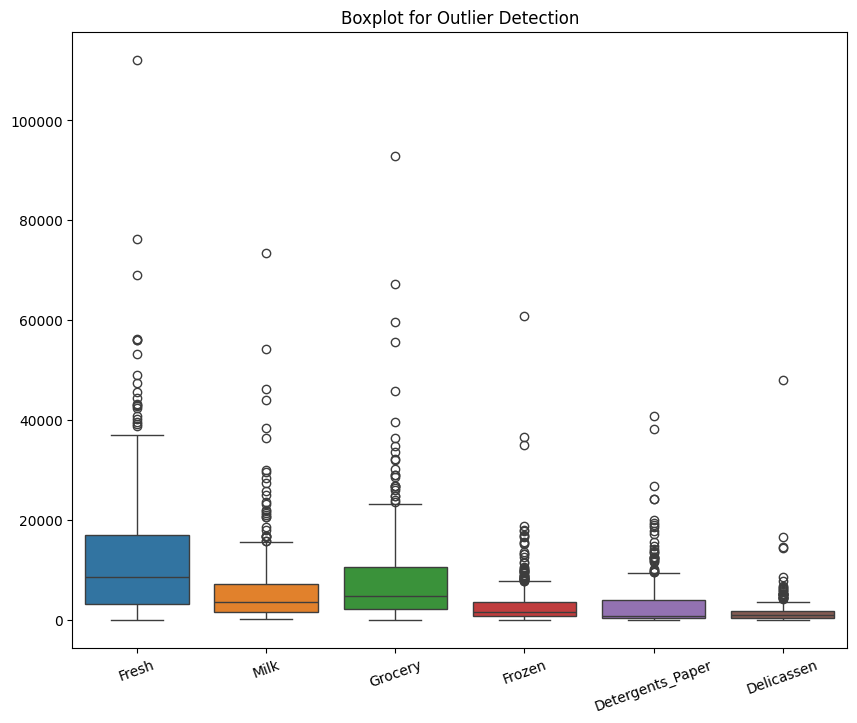

In [21]:
#detect and handle outliers using boxplots
columns_to_plot=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

plt.figure(figsize=(10, 8))
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=20)
plt.title("Boxplot for Outlier Detection")
plt.savefig('Boxplot for Outlier Detection.png')
plt.show()

In [22]:
#removing outliers by creating data as the new dataset
data=df
columns_to_detect_outliers = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for col in columns_to_detect_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [23]:
data.shape

(318, 8)

In [24]:
#alternative way of removing outliers using z-score
new_data=df
from scipy import stats
z_scores = np.abs(stats.zscore(new_data))
threshold = 3
new_data = new_data[(z_scores < threshold).all(axis=1)]
print("data before removing outliers:",df.shape)
print("data after removing outliers:",new_data.shape)


data before removing outliers: (440, 8)
data after removing outliers: (414, 8)


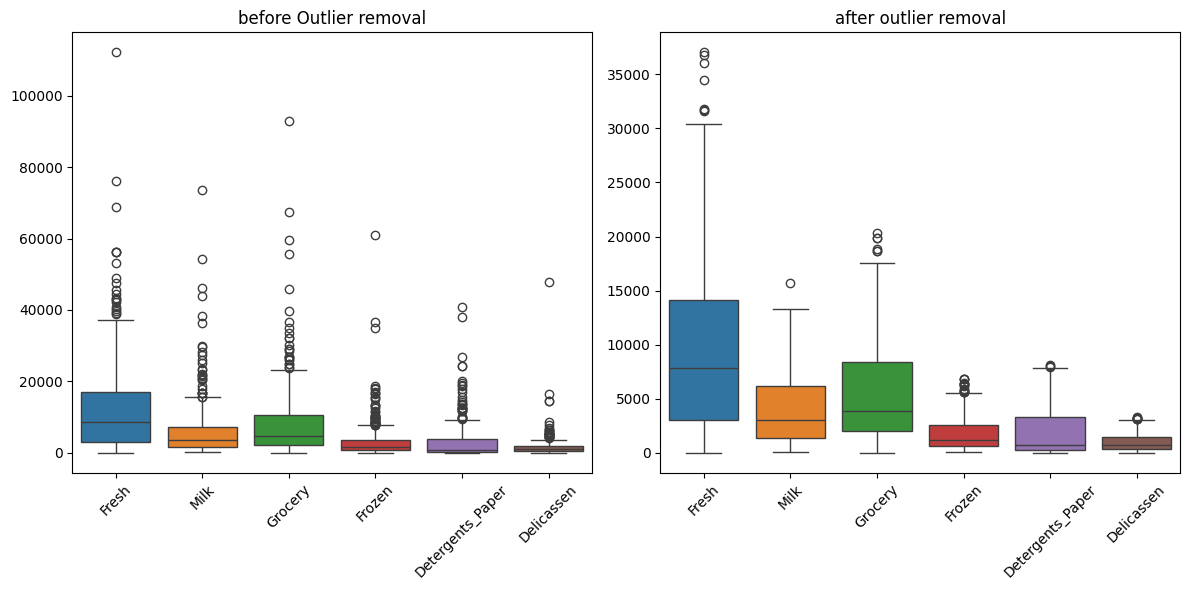

In [25]:
#subplot-compares before & after outlier removal
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12, 6))
axes = axes.flatten() # Flatten the 2x3 array of axes to a 1D array

columns_to_plot=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

sns.boxplot(data=df[columns_to_plot], ax=axes[0]) # Use the first axis
axes[0].set_title("before Outlier removal")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.boxplot(data=data[columns_to_plot], ax=axes[1]) # Use the second axis
axes[1].set_title("after outlier removal")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


# Analyzing spending patterns by Channel and Region.

In [26]:
#analyzing spending patterns by channel and region:


figsize=(30,18)
# 1. Summary statistics by Channel and Region
spending_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Group by Channel
channel_summary = df.groupby('Channel')[spending_columns].mean()
print(channel_summary, "\n")

# Group by Region
region_summary = df.groupby('Region')[spending_columns].mean()
print("\n", region_summary)

pd.set_option('display.width', 1000)


                Fresh          Milk       Grocery       Frozen  \
Channel                                                          
1        13475.560403   3451.724832   3962.137584  3748.251678   
2         8904.323944  10716.500000  16322.852113  1652.612676   

         Detergents_Paper   Delicassen  
Channel                                 
1              790.560403  1415.956376  
2             7269.507042  1753.436620   


                Fresh         Milk      Grocery       Frozen  Detergents_Paper  \
Region                                                                          
1       11101.727273  5486.415584  7403.077922  3000.337662       2651.116883   
2        9887.680851  5088.170213  9218.595745  4045.361702       3687.468085   
3       12533.471519  5977.085443  7896.363924  2944.594937       2817.753165   

         Delicassen  
Region               
1       1354.896104  
2       1159.702128  
3       1620.601266  


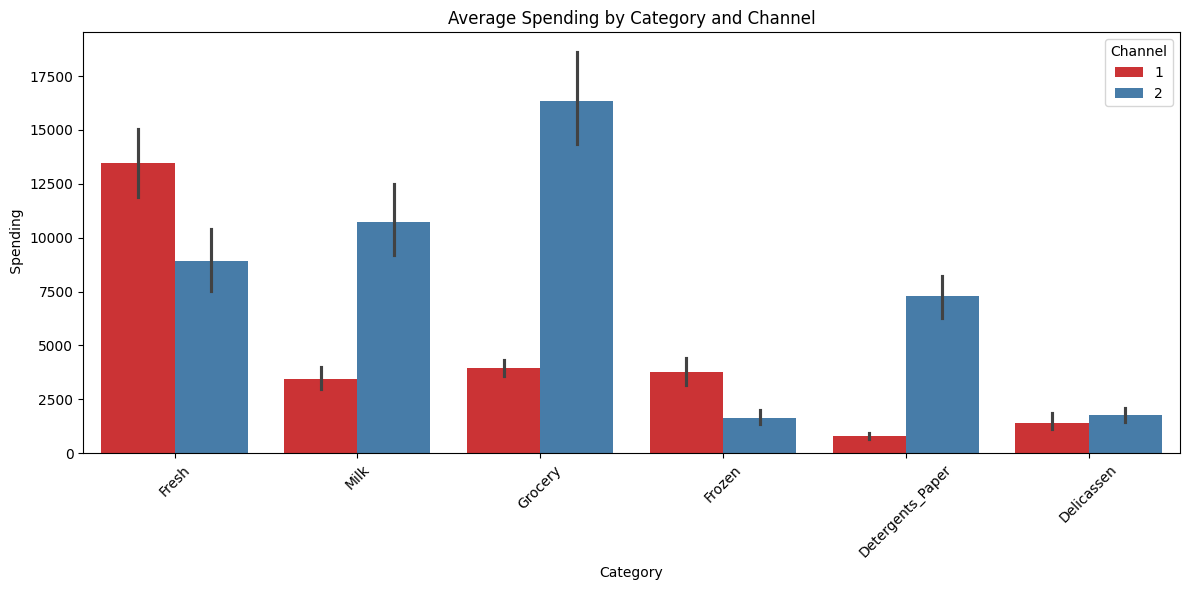

In [27]:
#Visualize the spending patterns by channel

# Melt the DataFrame for grouped barplot
df_melted = df.melt(id_vars='Channel', value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],
                    var_name='Category', value_name='Spending')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Category', y='Spending', hue='Channel',palette='Set1')
plt.title('Average Spending by Category and Channel')
plt.ylabel(' Spending')
plt.legend(title='Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
#Visualize the spending patterns by channel

#Melt the DataFrame for grouped barplot
df_melted = df.melt(id_vars='Region', value_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],
                    var_name='Category', value_name='Spending')
df_melted


,Region,Category,Spending
0,3,Fresh,12669
1,3,Fresh,7057
2,3,Fresh,6353
3,3,Fresh,13265
4,3,Fresh,22615
...,...,...,...
2635,3,Delicassen,2204
2636,3,Delicassen,2346
2637,3,Delicassen,1867
2638,3,Delicassen,2125


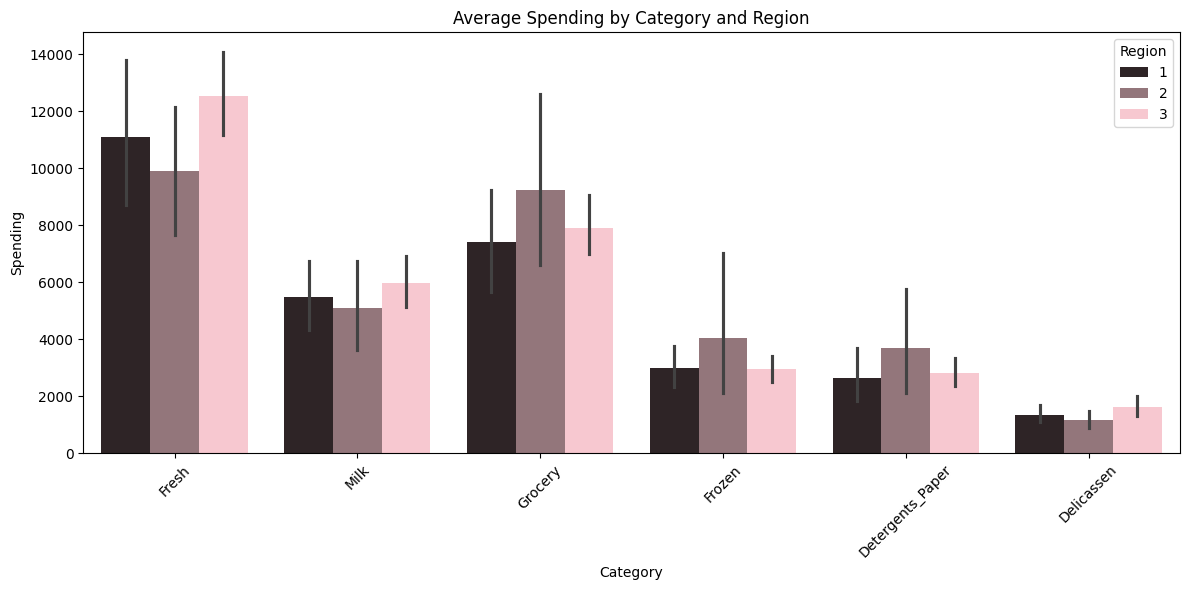

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Category', y='Spending', hue='Region',color='pink')
plt.title('Average Spending by Category and Region')
plt.ylabel('Spending')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Normalize Data

In [30]:
#scaling
#drop chanel and region
X=data.drop(['Channel','Region'],axis=1)

scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)
scaled_data

array([[ 0.36041979,  1.74071034,  0.43271395, -0.98480101,  0.37827742,
         0.45117793],
       [-0.32503941,  1.78801539,  0.86752557, -0.0233858 ,  0.65924069,
         1.00971769],
       [ 0.43321624, -0.8579957 , -0.29088884,  2.85961769, -0.60532095,
         1.02502015],
       ...,
       [ 0.85655936, -0.02063486,  0.52652234, -0.69041418,  0.24074613,
        -0.18642453],
       [ 0.06984469, -0.61686281, -0.7218008 , -0.47303994, -0.75919259,
         1.45476421],
       [-0.84658446, -0.70379352, -0.66157279, -1.07734033, -0.61893791,
        -1.18873561]])

# Part 2: Determine the Optimal Number of Clusters

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia=[]
silhouette_scores=[]
K_range=range(2,11)
for k in K_range:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_data)
  Labels=kmeans.labels_

  inertia_s=kmeans.inertia_
  inertia.append(inertia_s)

  sil_scores=silhouette_score(scaled_data,Labels)
  silhouette_scores.append(sil_scores)

  print(f'k={k}: inertia={inertia_s:.2f}, Silhouette Score={sil_scores:.2f}')

k=2: inertia=1253.57, Silhouette Score=0.35
k=3: inertia=1063.82, Silhouette Score=0.33
k=4: inertia=886.54, Silhouette Score=0.26
k=5: inertia=810.49, Silhouette Score=0.23
k=6: inertia=762.71, Silhouette Score=0.22
k=7: inertia=730.83, Silhouette Score=0.22
k=8: inertia=646.81, Silhouette Score=0.22
k=9: inertia=624.90, Silhouette Score=0.22
k=10: inertia=599.25, Silhouette Score=0.18


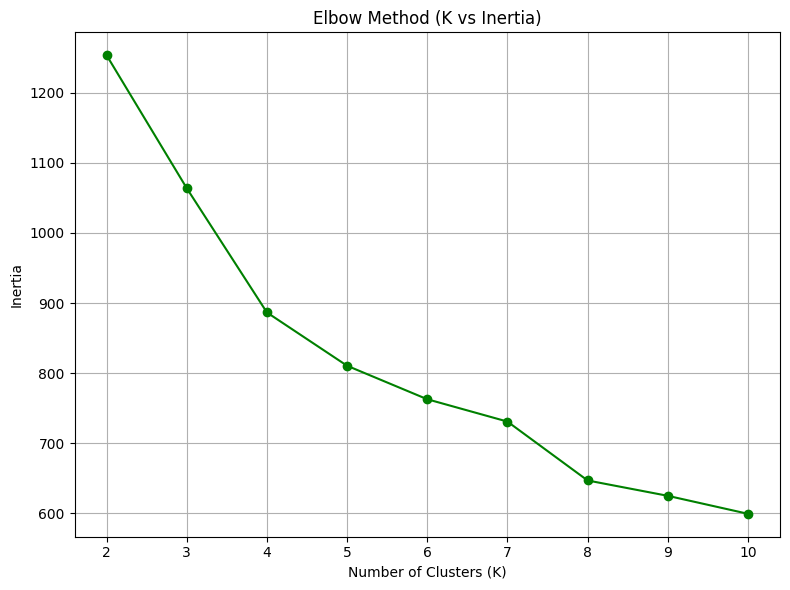

In [32]:
# Step 2: Plot Elbow Curve
plt.figure(figsize=(8, 6))

plt.plot(K_range, inertia, marker='o', color='green')
plt.title('Elbow Method (K vs Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()

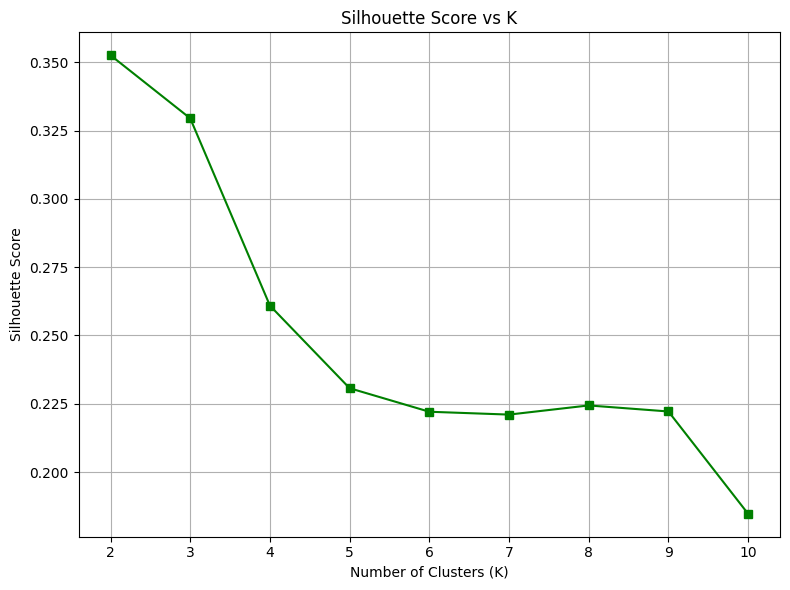

In [33]:
#Plot Silhouette Scores
plt.figure(figsize=(8, 6))

plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [34]:
#The optimal number of cluster
best_k = K_range[np.argmax(sil_scores)]
print(f": K = {best_k}")


: K = 2



 # Part 3: Apply KMeans with Optimal K

In [35]:
optimal_k = 3

# Fit KMeans on scaled data
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(scaled_data)


KMeans(n_clusters=3, random_state=42)

In [36]:
# Get cluster labels
cluster_labels = kmeans_final.labels_


In [37]:

# Add cluster labels to original data
X['Cluster'] = cluster_labels
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
3,13265,1196,4221,6404,507,1788,0
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,0
...,...,...,...,...,...,...,...
432,21117,1162,4754,269,1328,395,0
433,1982,3218,1493,1541,356,1449,0
434,16731,3922,7994,688,2371,838,0
438,10290,1981,2232,1038,168,2125,0


In [38]:
cluster2=X[X['Cluster']==1]
cluster3=X[X['Cluster']==2]
cluster3.head(6)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
9,6006,11093,18881,1159,7425,2098,2
10,3366,5403,12974,4400,5977,1744,2
13,21217,6208,14982,3095,6707,602,2
16,1020,8816,12121,134,4508,1080,2


# Part 4: Cluster Profiling

In [39]:
# product category columns
spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Group by cluster and calculate mean spending per cluster
cluster_profile = X.groupby('Cluster')[spending_cols].mean().round(2)

cluster_profile

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,8918.96,2135.08,2846.85,1963.66,625.75,687.44
1,20656.31,5471.78,6705.16,1954.47,1604.42,2118.20
2,5405.72,7769.08,11697.23,1300.33,5014.00,1071.83


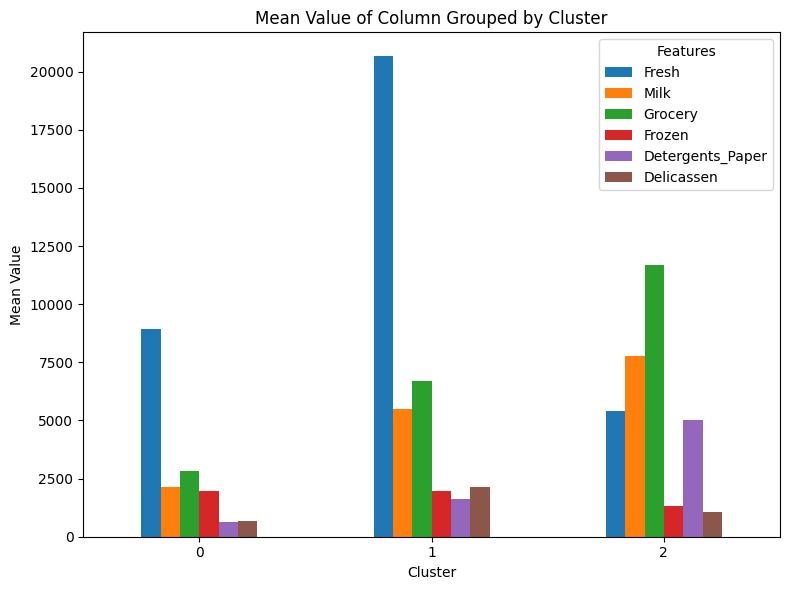

In [40]:
#Visualize the cluster profile by creatig bar plot:
cluster_profile.plot(kind='bar', figsize=(8, 6))
plt.title('Mean Value of Column Grouped by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.tight_layout()
plt.savefig('Mean Value of Column Grouped by Cluster.png')
plt.show()

## Part 5: Business Application – Targeted Strategy

# Interpretation & Businesss Insights

```
Cluster 0: Low-Spending Regular Buyers
Insight: These customers shop consistently but tend to spend less overall.

Recommended Action: Introduce loyalty rewards, promote higher-end items through personalized offers, and use tailored marketing to encourage greater spending.

*Cluster 1: Mid-Level Retail Customers*
Insight: These customers spend moderately across all categories and contribute significantly to overall revenue.

Recommended Action: Provide them with exclusive deals and premium service options. Focus on customer retention strategies to reduce the risk of losing them.

Cluster 2: High-Spending Fresh Product Buyers
Insight: Customers in this segment spend heavily on fresh items, indicating a specialization in fresh product purchases.

Recommended Action: Emphasize top-quality and freshness, offer volume-based discounts, and consider introducing related or complementary products to increase value.
```

In [41]:
#Add a new column "Suggested Strategy" to the DataFrame based on the cluster.
def marketing(cluster):
    if cluster == 0:
        return 'Upsell cross-category bundles'
    elif cluster == 1:
        return 'Loyalty rewards and freshness-focused offers'
    elif cluster == 2:
        return 'Volume discounts on cleaning and bulk items'
    else:
        return 'General marketing strategy'

X['Suggested Strategy'] = X['Cluster'].apply(marketing)
X.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Suggested Strategy
0,12669,9656,7561,214,2674,1338,2,Volume discounts on cleaning and bulk items
1,7057,9810,9568,1762,3293,1776,2,Volume discounts on cleaning and bulk items
3,13265,1196,4221,6404,507,1788,0,Upsell cross-category bundles
5,9413,8259,5126,666,1795,1451,1,Loyalty rewards and freshness-focused offers
6,12126,3199,6975,480,3140,545,0,Upsell cross-category bundles
7,7579,4956,9426,1669,3321,2566,1,Loyalty rewards and freshness-focused offers
8,5963,3648,6192,425,1716,750,0,Upsell cross-category bundles
9,6006,11093,18881,1159,7425,2098,2,Volume discounts on cleaning and bulk items
10,3366,5403,12974,4400,5977,1744,2,Volume discounts on cleaning and bulk items
11,13146,1124,4523,1420,549,497,0,Upsell cross-category bundles
